# Imports

In [1]:
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
import pandas as pd
import requests
import urllib
import io
import os
import sys
from scipy import stats
import numpy as np
import sys
!{sys.executable} -m pip install graphviz
import graphviz


Defaulting to user installation because normal site-packages is not writeable


# Baixando arquivos (demora, só precisa baixar uma vez)

In [2]:
name_prefix='ABONOP_'
abono_name_base = 'http://repositorio.dados.gov.br/segrt/'
months =['01','02','03','04','05','06','07','08','09','10','11','12']
years = range(2017,2021)
tables = []

In [3]:
for y in years:
  for m in months:
    filename = name_prefix+str(m)+str(y)+'.csv'
    print(filename)
    url = abono_name_base+filename
    print(url)
    #try: #the .csv files goes until 2020-08
    try:
        urllib.request.urlretrieve(url, 'data/'+filename)
    except:
        pass
    table = pd.read_csv(url, encoding = "ISO-8859-1", error_bad_lines=False)
    tables.append(table)
    #except:
    #pass   


ABONOP_012017.csv
http://repositorio.dados.gov.br/segrt/ABONOP_012017.csv


KeyboardInterrupt: 

# Definição das funções

In [27]:
def clear_table(tbl):
    no_duplicates = tbl.drop_duplicates()
    no_null = no_duplicates.dropna()
    #print('Antes: {} Depois: {}'.format(str(len(tbl.index)),str(len(no_null))))
    return no_null

def describe_dirtness(tbl,csv_name):    
    duplicates = table[tbl.duplicated(table.columns,keep=False)].sort_values('Nome');
    nans = table.isna().sum()
    data = {'table':csv_name,'original_size':[len(table.index)],'duplicates':[len(duplicates.index)],'nans':[len(nans.index)],'removed':-1,'filtered_size':-1}
    info = pd.DataFrame(data)
    return info

def get_year_month_from_filename(csv_name):
    striped_name = csv_name.split('.')[0].split('_')[1]
    month = striped_name[0:2]
    year = striped_name[2:6]
    return (month,year)

def calculate_single_table_dirtness(table,f):
    single_table_dirtness =  describe_dirtness(table,f)    
    single_table_dirtness.at[0,'filtered_size'] = len(clean_table.index)
    single_table_dirtness.at[0,'month'] = get_year_month_from_filename(single_table_dirtness.at[0,'table'])[0]
    single_table_dirtness.at[0,'year'] = get_year_month_from_filename(single_table_dirtness.at[0,'table'])[1]
    single_table_dirtness.at[0,'removed'] = single_table_dirtness.at[0,'duplicates']+single_table_dirtness.at[0,'nans']
    return single_table_dirtness

def parse_float(text):
    if  isinstance(text,str):
        result = float(text.replace(',','.'))
    else: 
        result = text
    return result

def enable_print():
    sys.stdout = sys.__stdout__

def disable_print():
    sys.stdout = open(os.devnull, 'w')   

def remove_outliers(data,target_col,limit=0.99):
    q=data[target_col].quantile(limit)
    d = data_encoded[data_encoded['Val'] < q]
    d[[target_col]].boxplot()
    return d

# lendo o dataset

In [29]:
files = os.listdir('data')
dataset = pd.DataFrame()
initial_size = len(dataset.index)
all_dirtiness = pd.DataFrame(columns = ['table','month','year','original_size','duplicates','nans','removed','filtered_size'])
for f in files:
    try:
        path = 'data/'+f
        print(path)        
        table = pd.read_csv(path, encoding = "ISO-8859-1", delimiter=';', index_col=False, error_bad_lines=False,warn_bad_lines=False);
        clean_table = clear_table(table);
        clean_table['Mês'] = get_year_month_from_filename(f)[0]
        clean_table['Ano'] = get_year_month_from_filename(f)[1]
        dataset = dataset.append(clean_table);
        single_table_dirtness =  calculate_single_table_dirtness(table,f);
        all_dirtiness = all_dirtiness.append(single_table_dirtness, ignore_index=True)        
    except:
        pass
all_dirtiness = all_dirtiness[['table','month','year','original_size','duplicates','nans','removed','filtered_size']]
all_dirtiness.sort_values(['year','month'],inplace=True)

dataset['Val'] = dataset['Val'].map(parse_float)
dataset['Quantidade de meses no Serviço público'] = dataset['Quantidade de meses no Serviço público'].map(parse_float)
dataset['Quantidade de anos no Serviço público'] = dataset['Quantidade de anos no Serviço público'].map(parse_float)

data/ABONOP_022017.csv
data/ABONOP_112018.csv
data/ABONOP_112019.csv
data/ABONOP_012018.csv
data/ABONOP_122018.csv
data/ABONOP_042017.csv
data/ABONOP_062019.csv
data/ABONOP_072020.csv
data/ABONOP_042018.csv
data/ABONOP_072019.csv
data/ABONOP_062020.csv
data/ABONOP_042019.csv
data/ABONOP_052018.csv
data/ABONOP_022020.csv
data/ABONOP_032020.csv
data/ABONOP_062018.csv
data/ABONOP_012020.csv
data/ABONOP_032017.csv
data/ABONOP_102019.csv
data/ABONOP_012017.csv
data/ABONOP_102017.csv
data/ABONOP_082019.csv
data/ABONOP_072017.csv
data/ABONOP_022018.csv
data/ABONOP_082017.csv
data/ABONOP_092017.csv
data/ABONOP_052017.csv
data/ABONOP_032019.csv
data/ABONOP_062017.csv
data/ABONOP_052019.csv
data/ABONOP_082018.csv
data/ABONOP_102018.csv
data/ABONOP_122019.csv
data/ABONOP_122017.csv
data/ABONOP_022019.csv
data/ABONOP_082020.csv
data/ABONOP_042020.csv
data/ABONOP_072018.csv
data/ABONOP_112017.csv
data/ABONOP_012019.csv
data/ABONOP_092018.csv
data/ABONOP_052020.csv
data/ABONOP_092019.csv
data/ABONOP

# Exibindo quanto de dados ruins (nulos e NaNs) foi removido em cada ano

In [32]:
all_dirtiness
removed = all_dirtiness['original_size'].sum() - all_dirtiness['filtered_size'].sum()
print('Removeu {} linhas'.format(str(removed)))

Removeu 635 linhas


# Descrevendo os dados inválidos de acordo com o ano

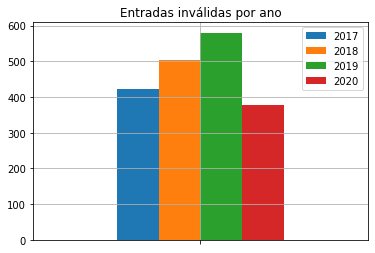

In [19]:
by_year = {}
for y in years:
    by_year[y] = [all_dirtiness[all_dirtiness['year'] == str(y)]['removed'].sum()]
pd.DataFrame(by_year).plot.bar(grid='both',title='Entradas inválidas por ano',xticks=None)
plt.tick_params(labelbottom=False)

# Contando o total de entradas

In [20]:
final_size = len(dataset.index)
difference = final_size - initial_size

print('The dataset had {} rows before filtering and now have {} rows after filtering. Leading to a difference of {} rows'.format(str(initial_size), str(final_size), str(difference)))

The dataset had 0 rows before filtering and now have 4349187 rows after filtering. Leading to a difference of 4349187 rows


# Descrevendo a distribuição de valores pagos

In [7]:
dataset['Val'].describe()

count    4.349186e+06
mean     1.075332e+03
std      8.809571e+02
min      0.000000e+00
25%      5.579100e+02
50%      7.931600e+02
75%      1.201490e+03
max      4.025461e+04
Name: Val, dtype: float64

## Neste experimento iremos dar mais enfoque ao contexto dos dados no estado de Alagoas, pois temos interesse em realizar algumas inferências neste contexto.

* Todavia iremos dar uma descrição, menos detalhada, dos dados em um geral.

# Abono por estado

In [11]:
by_state=dataset.groupby(by='UF da Residência')

## Com outliers

           AxesSubplot(0.1,0.792857;0.137931x0.107143)
AC    AxesSubplot(0.265517,0.792857;0.137931x0.107143)
AL    AxesSubplot(0.431034,0.792857;0.137931x0.107143)
AM    AxesSubplot(0.596552,0.792857;0.137931x0.107143)
AP    AxesSubplot(0.762069,0.792857;0.137931x0.107143)
BA         AxesSubplot(0.1,0.664286;0.137931x0.107143)
CE    AxesSubplot(0.265517,0.664286;0.137931x0.107143)
DF    AxesSubplot(0.431034,0.664286;0.137931x0.107143)
ES    AxesSubplot(0.596552,0.664286;0.137931x0.107143)
GO    AxesSubplot(0.762069,0.664286;0.137931x0.107143)
MA         AxesSubplot(0.1,0.535714;0.137931x0.107143)
MG    AxesSubplot(0.265517,0.535714;0.137931x0.107143)
MS    AxesSubplot(0.431034,0.535714;0.137931x0.107143)
MT    AxesSubplot(0.596552,0.535714;0.137931x0.107143)
PA    AxesSubplot(0.762069,0.535714;0.137931x0.107143)
PB         AxesSubplot(0.1,0.407143;0.137931x0.107143)
PE    AxesSubplot(0.265517,0.407143;0.137931x0.107143)
PI    AxesSubplot(0.431034,0.407143;0.137931x0.107143)
PR    Axes

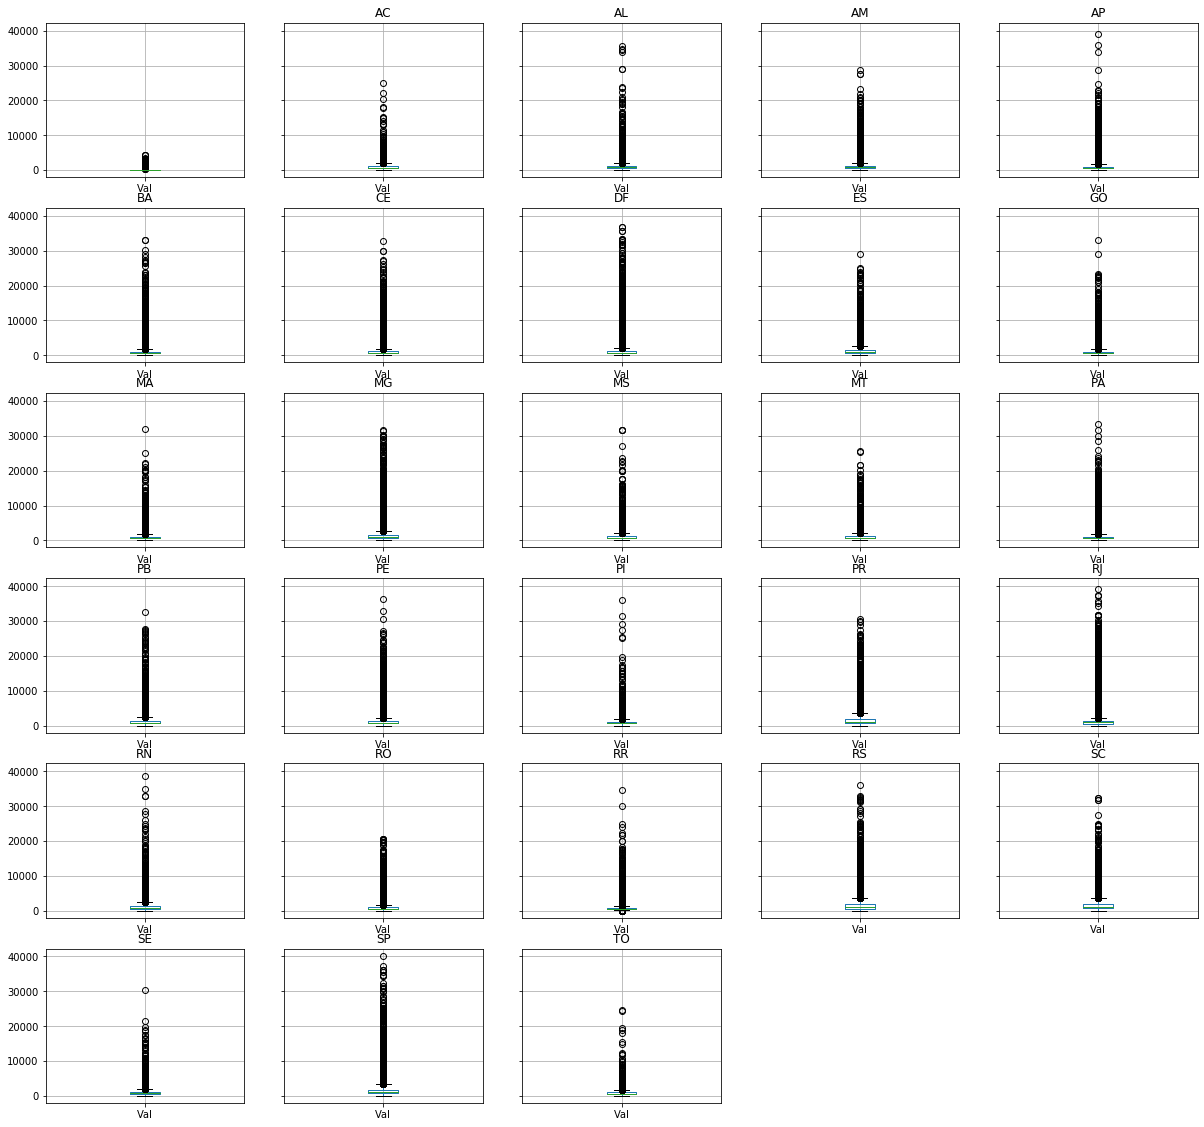

In [12]:
by_state.boxplot(column='Val',  fontsize=10, figsize=(20,20), showfliers=True)

## Sem outliers

           AxesSubplot(0.1,0.792857;0.137931x0.107143)
AC    AxesSubplot(0.265517,0.792857;0.137931x0.107143)
AL    AxesSubplot(0.431034,0.792857;0.137931x0.107143)
AM    AxesSubplot(0.596552,0.792857;0.137931x0.107143)
AP    AxesSubplot(0.762069,0.792857;0.137931x0.107143)
BA         AxesSubplot(0.1,0.664286;0.137931x0.107143)
CE    AxesSubplot(0.265517,0.664286;0.137931x0.107143)
DF    AxesSubplot(0.431034,0.664286;0.137931x0.107143)
ES    AxesSubplot(0.596552,0.664286;0.137931x0.107143)
GO    AxesSubplot(0.762069,0.664286;0.137931x0.107143)
MA         AxesSubplot(0.1,0.535714;0.137931x0.107143)
MG    AxesSubplot(0.265517,0.535714;0.137931x0.107143)
MS    AxesSubplot(0.431034,0.535714;0.137931x0.107143)
MT    AxesSubplot(0.596552,0.535714;0.137931x0.107143)
PA    AxesSubplot(0.762069,0.535714;0.137931x0.107143)
PB         AxesSubplot(0.1,0.407143;0.137931x0.107143)
PE    AxesSubplot(0.265517,0.407143;0.137931x0.107143)
PI    AxesSubplot(0.431034,0.407143;0.137931x0.107143)
PR    Axes

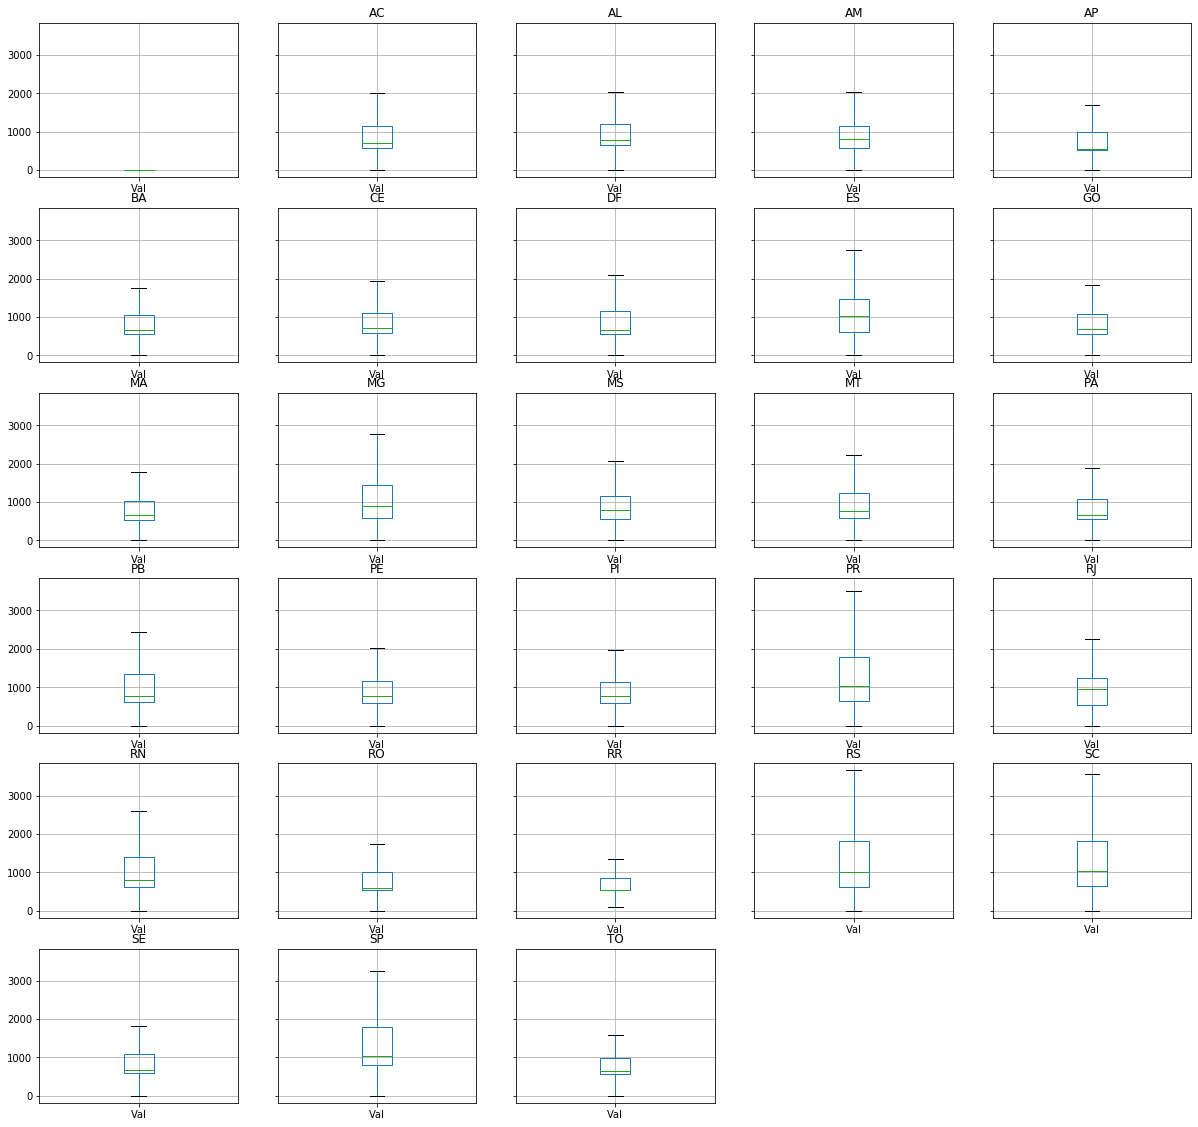

In [29]:
by_state.boxplot(column='Val',  fontsize=10, figsize=(20,20), showfliers=False)

## Em Alagoas

In [34]:
al_df = by_state.get_group('AL').reset_index()
al_df.describe()

,index,Quantidade de anos no Serviço público,Quantidade de meses no Serviço público,Ano/Mês inicial do abono de permanência,Val
count,78059.000000,78059.000000,78059.000000,78059.000000,78059.000000
mean,45000.635225,35.517839,5.220397,201188.293957,1091.202176
std,26136.235077,4.798000,3.448408,412.060687,811.805606
min,138.000000,8.000000,0.000000,200301.000000,0.000000
25%,28744.000000,33.000000,2.000000,200909.000000,659.930000
50%,36281.000000,36.000000,5.000000,201304.000000,782.130000
75%,65534.500000,38.000000,8.000000,201501.000000,1210.930000
max,106952.000000,53.000000,11.000000,202006.000000,35673.030000


# Valor pago com outliers

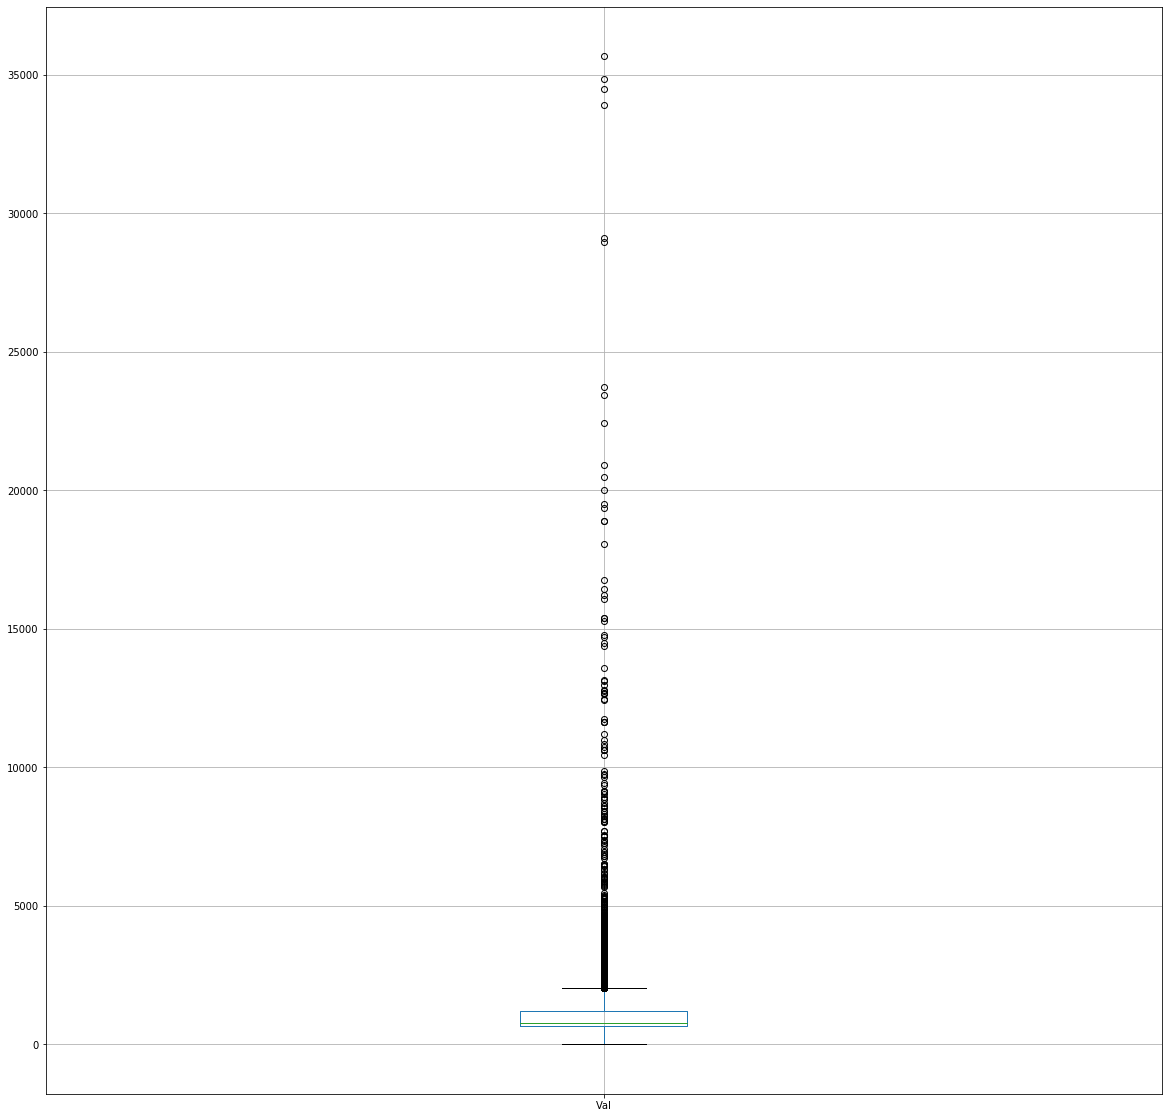

In [37]:
al_df.boxplot(column='Val',  fontsize=10, figsize=(20,20), showfliers=True)

# Valor pago sem outliers

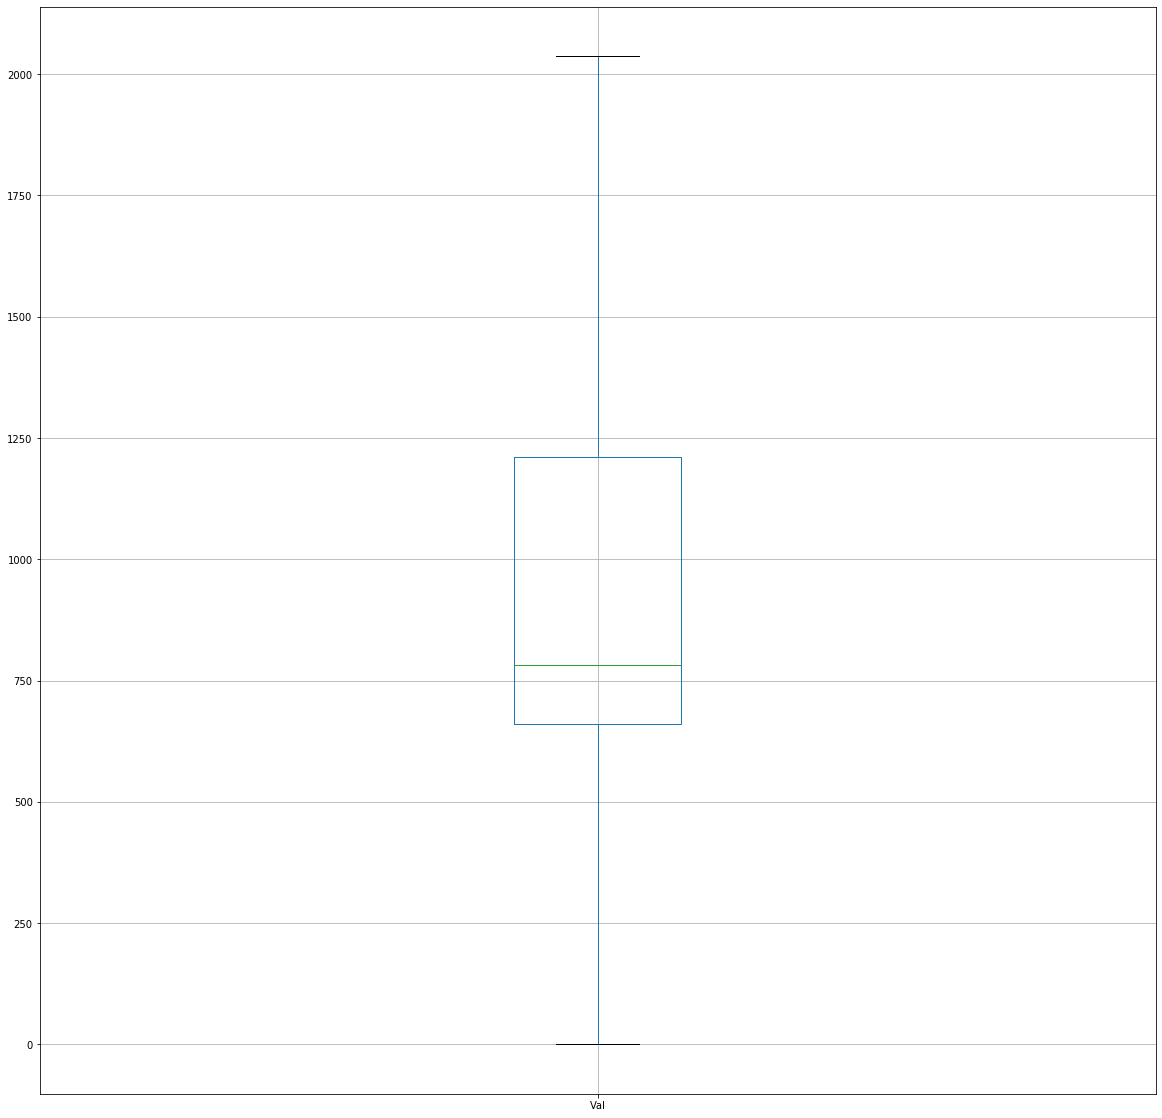

In [33]:
al_df.boxplot(column='Val',  fontsize=10, figsize=(20,20), showfliers=False)

# Agrupando por valor pago

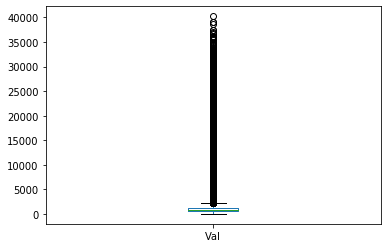

In [10]:
dataset['Val'].plot.box()

## Com outliers

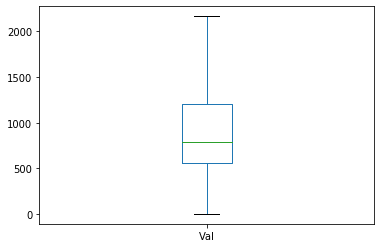

In [9]:
dataset['Val'].plot.box(showfliers=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac0e735080>]],
      dtype=object)

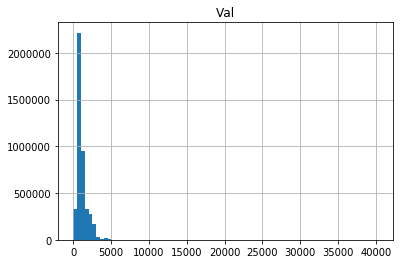

In [8]:
dataset.hist(column='Val',bins=80)

# Sem outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac315ad978>]],
      dtype=object)

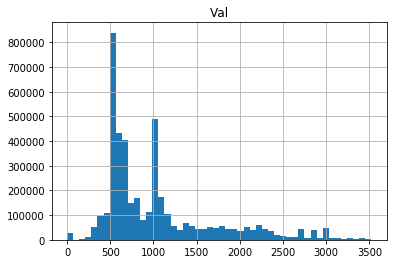

In [10]:
q = dataset["Val"].quantile(0.99)
#description
no_outliers = dataset[dataset['Val'] <  q]
no_outliers.hist(column='Val',bins=50)


# Abono por escolaridade

In [13]:
by_education = dataset.groupby(by='Nível de Escolaridade')

4A. SERIE DO PRIMEIRO GRAU COMPLETA                   AxesSubplot(0.1,0.736957;0.235294x0.163043)
ALFABETIZADO SEM CURSOS REGULARES                AxesSubplot(0.382353,0.736957;0.235294x0.163043)
DOUTORADO                                        AxesSubplot(0.664706,0.736957;0.235294x0.163043)
ENSINO FUNDAMENTAL                                    AxesSubplot(0.1,0.541304;0.235294x0.163043)
ENSINO FUNDAMENTAL INCOMPLETO                    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
ENSINO MEDIO                                     AxesSubplot(0.664706,0.541304;0.235294x0.163043)
ENSINO SUPERIOR                                       AxesSubplot(0.1,0.345652;0.235294x0.163043)
MESTRADO                                         AxesSubplot(0.382353,0.345652;0.235294x0.163043)
PRIMEIRO GRAU INCOMP.-ATE A 4A.SERIE INCOMP.     AxesSubplot(0.664706,0.345652;0.235294x0.163043)
SEGUNDO GRAU INCOMPLETO                                   AxesSubplot(0.1,0.15;0.235294x0.163043)
SUPERIOR INCOMPLETO 

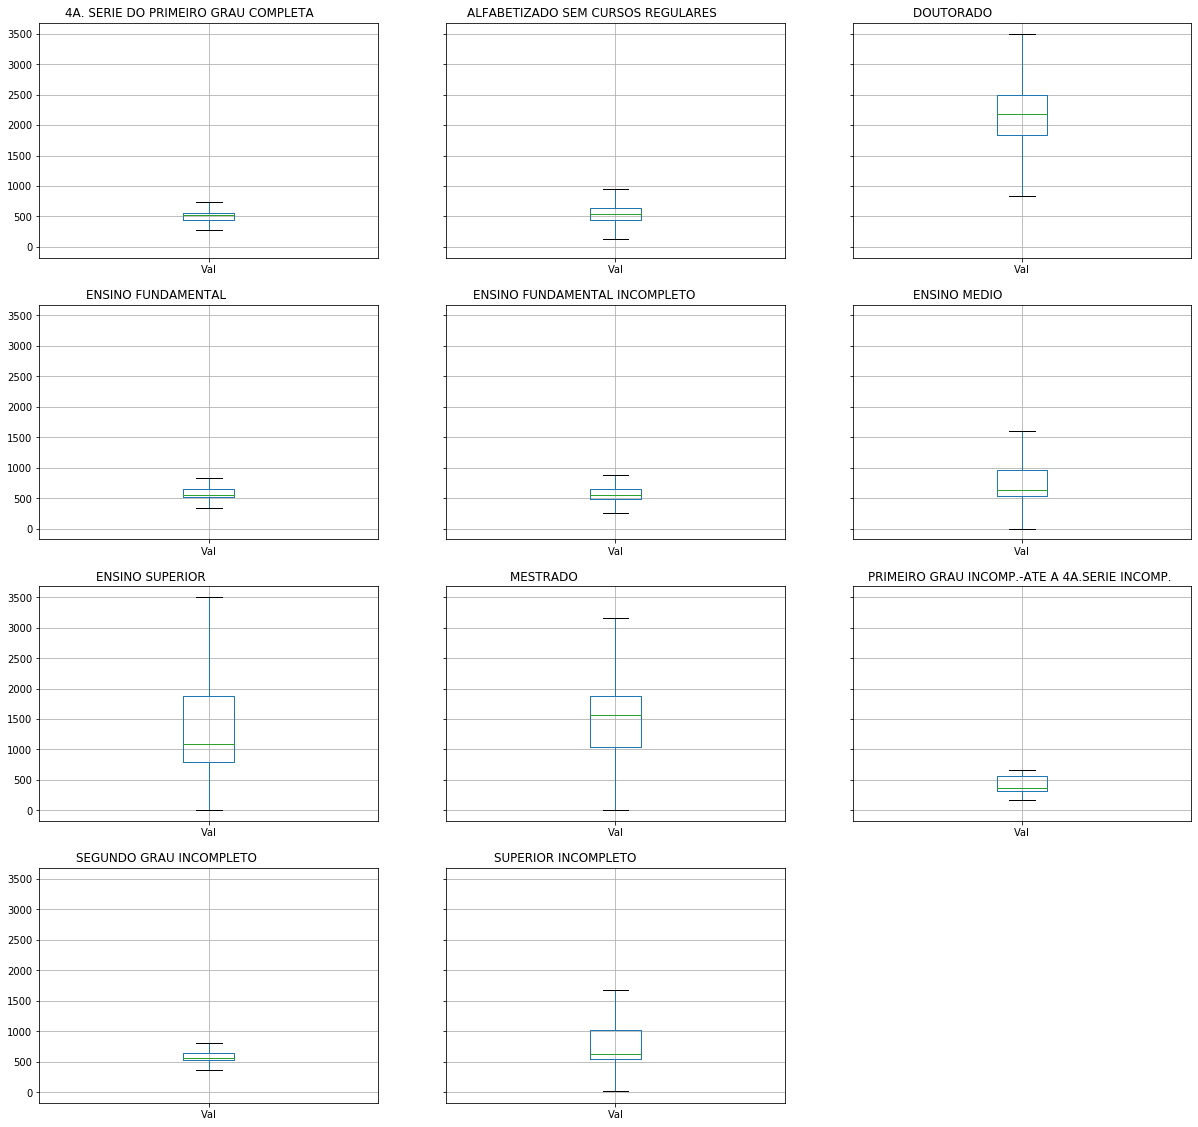

In [41]:
by_education.boxplot(column='Val',  fontsize=10, figsize=(20,20), showfliers=False)

## Abono por escolaridade  em Alagoas

ALFABETIZADO SEM CURSOS REGULARES                     AxesSubplot(0.1,0.679412;0.235294x0.220588)
DOUTORADO                                        AxesSubplot(0.382353,0.679412;0.235294x0.220588)
ENSINO FUNDAMENTAL                               AxesSubplot(0.664706,0.679412;0.235294x0.220588)
ENSINO FUNDAMENTAL INCOMPLETO                         AxesSubplot(0.1,0.414706;0.235294x0.220588)
ENSINO MEDIO                                     AxesSubplot(0.382353,0.414706;0.235294x0.220588)
ENSINO SUPERIOR                                  AxesSubplot(0.664706,0.414706;0.235294x0.220588)
MESTRADO                                                  AxesSubplot(0.1,0.15;0.235294x0.220588)
SUPERIOR INCOMPLETO                                  AxesSubplot(0.382353,0.15;0.235294x0.220588)
dtype: object

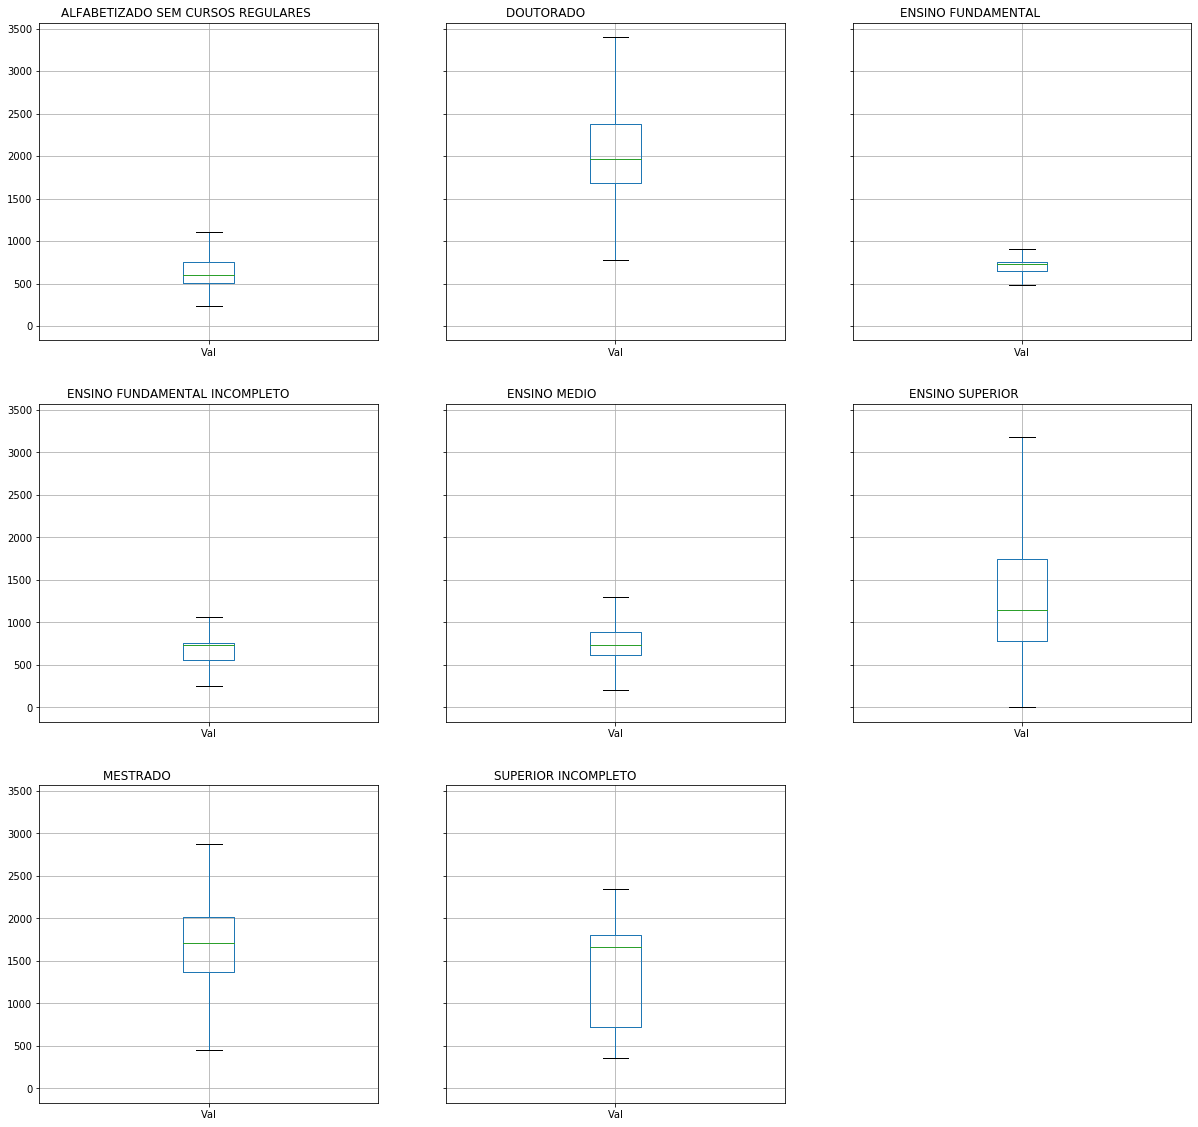

In [45]:
al_by_education = al_df.groupby(by='Nível de Escolaridade')
al_by_education.boxplot(column='Val',  fontsize=10, figsize=(20,20), showfliers=False)

# Abono por ano

2017         AxesSubplot(0.1,0.559091;0.363636x0.340909)
2018    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2019             AxesSubplot(0.1,0.15;0.363636x0.340909)
2020        AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

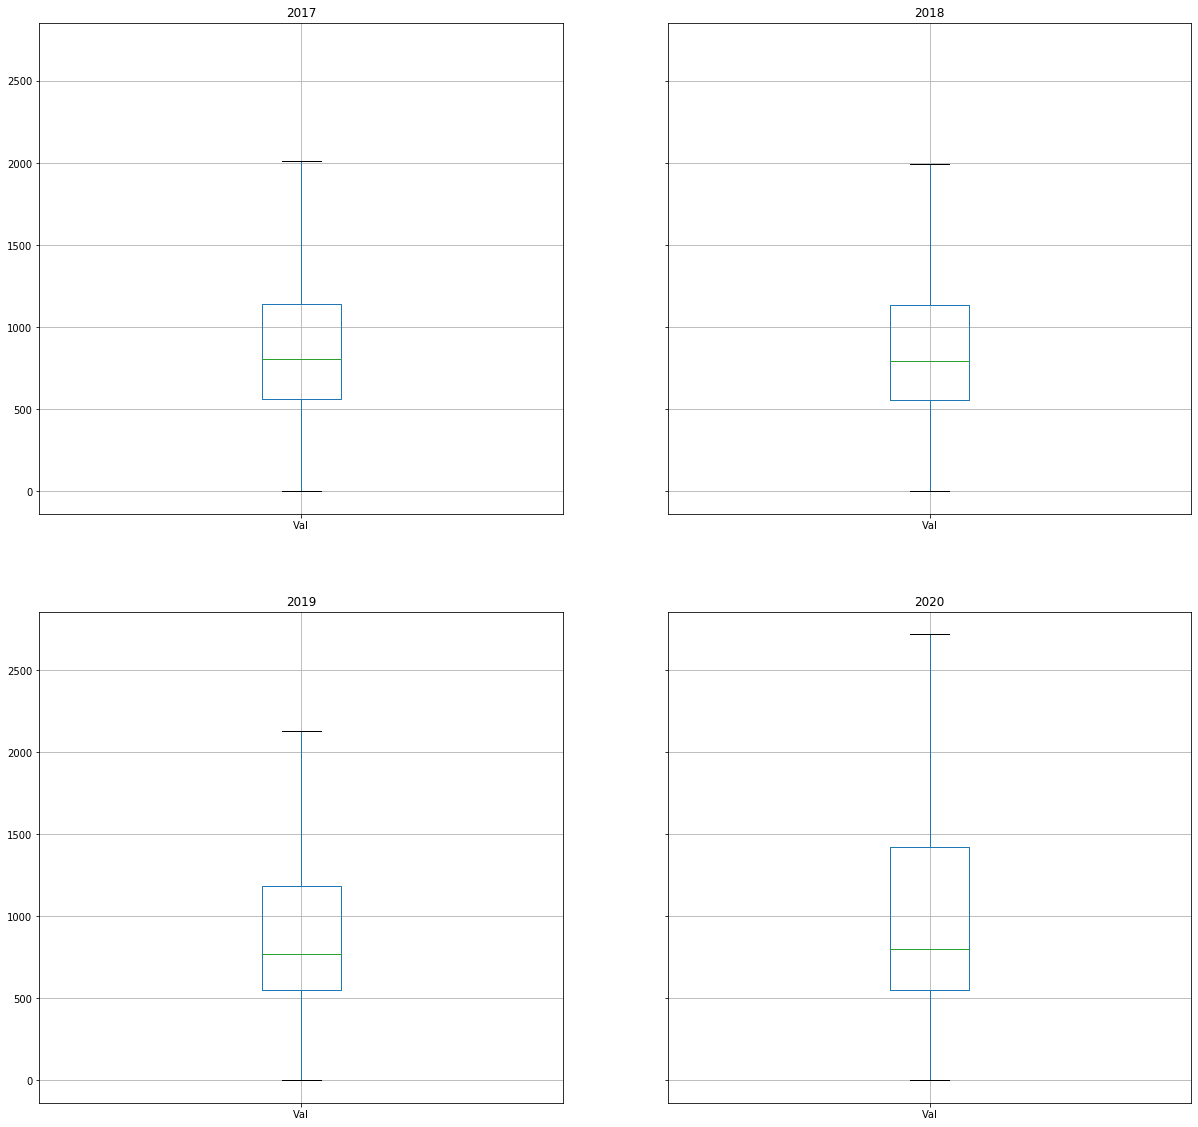

In [49]:
by_year = dataset.groupby(by='Ano')
by_year.boxplot(column='Val',  fontsize=10, figsize=(20,20), showfliers=False)

# Abono por ano em Alagoas

2017         AxesSubplot(0.1,0.559091;0.363636x0.340909)
2018    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2019             AxesSubplot(0.1,0.15;0.363636x0.340909)
2020        AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

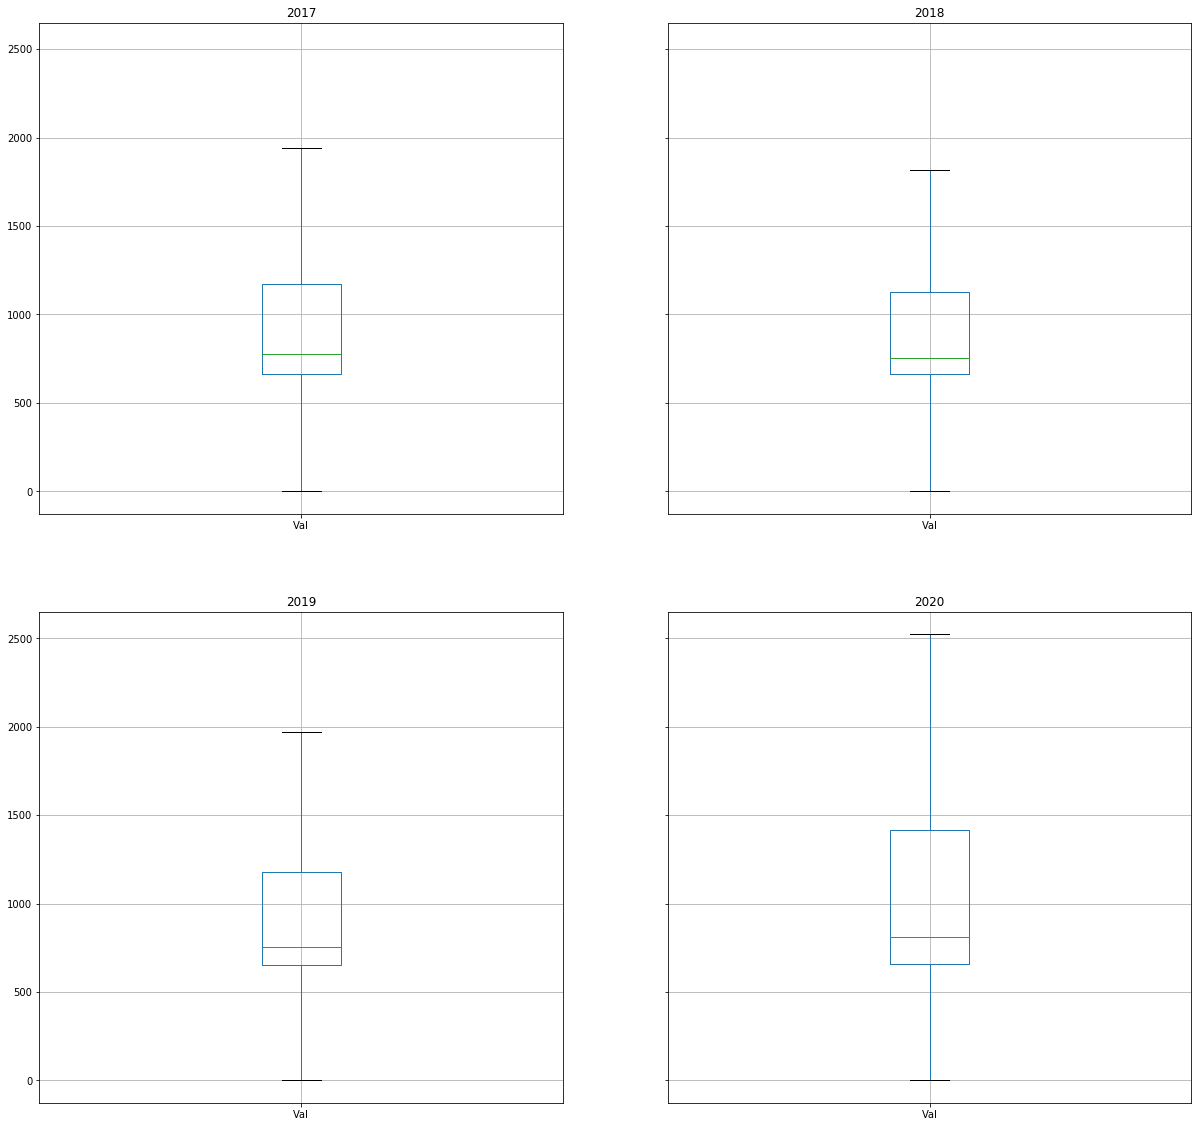

In [51]:
al_by_year = al_df.groupby(by='Ano')
al_by_year.boxplot(column='Val',  fontsize=10, figsize=(20,20), showfliers=False)

# Predições

## Estamos interessados em realizar algumas predições no contexto do funcionalismo público federal no estado de Alagoas.

* Podemos capturar a subamostra das entradas de Alagoas pelo agrupamento 'by_state'

In [54]:
al_df

,index,Nome,CPF,Descrição do cargo emprego,Nível de Escolaridade,Denominação do órgão de atuação,UF da UPAG de vinculação,Denominação unidade organizacional,UF da Residência,Cidade da residência,Situação servidor,Quantidade de anos no Serviço público,Quantidade de meses no Serviço público,Ano/Mês inicial do abono de permanência,Val,Mês,Ano
0,272,ERIVALDO ALVES DOS SANTOS ...,***400694**,ENGENHEIRO,ENSINO SUPERIOR,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AL,SUP FED AGRIC PEC ABAST EST ALAGOAS-AL,AL,MACEIO,ATIVO PERMANENTE,37.0,0.0,201207.0,1544.35,02,2017
1,273,LUZIANE DE OMENA REIS ...,***255803**,AGENTE ADMINISTRATIVO,ENSINO SUPERIOR,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AL,SUP FED AGRIC PEC ABAST EST ALAGOAS-AL,AL,MACEIO,ATIVO PERMANENTE,36.0,11.0,201105.0,557.42,02,2017
2,274,ITAMARA PONTES DOS SANTOS MARQUES ...,***506714**,DATILOGRAFO,ENSINO MEDIO,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AL,SUP FED AGRIC PEC ABAST EST ALAGOAS-AL,AL,MACEIO,ATIVO PERMANENTE,36.0,11.0,201101.0,536.68,02,2017
3,275,JOSETE BUARQUE DE GUSMAO ...,***619024**,AGENTE ADMINISTRATIVO,ENSINO MEDIO,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AL,SUP FED AGRIC PEC ABAST EST ALAGOAS-AL,AL,MACEIO,ATIVO PERMANENTE,36.0,11.0,201112.0,549.12,02,2017
4,276,MARIA JOSE DO NASCIMENTO ALBUQUERQUE ...,***083204**,DATILOGRAFO,ENSINO MEDIO,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AL,SUP FED AGRIC PEC ABAST EST ALAGOAS-AL,AL,MACEIO,ATIVO PERMANENTE,36.0,11.0,201004.0,540.82,02,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78054,105258,MIGUEL ANGELO DE VASCONCELOS BUARQUE ...,***373304**,TECNICO DO SEGURO SOCIAL,ENSINO SUPERIOR,INSTITUTO NACIONAL DE SEGURO SOCIAL,AL,SEC DE RECURSOS HUMANOS/MACEIO,AL,MACEIÓ,ATIVO PERMANENTE,33.0,6.0,201511.0,1088.40,03,2018
78055,105259,TARCILIA MARIA TENORIO DE BRITO BARBOZA ...,***699284**,TECNICO DO SEGURO SOCIAL,ENSINO SUPERIOR,INSTITUTO NACIONAL DE SEGURO SOCIAL,AL,SEC DE RECURSOS HUMANOS/MACEIO,AL,MACEIO,ATIVO PERMANENTE,39.0,0.0,200807.0,1107.10,03,2018
78056,105260,IVANISE TAVARES DO NASCIMENTO MOREIRA ...,***818634**,TECNICO DO SEGURO SOCIAL,ENSINO SUPERIOR,INSTITUTO NACIONAL DE SEGURO SOCIAL,AL,SEC DE RECURSOS HUMANOS/MACEIO,AL,MACEIO,ATIVO PERMANENTE,35.0,8.0,200909.0,1081.09,03,2018
78057,105536,MARIA LUCIA CEDRIM DA SILVA ...,***498844**,TECNICO FEDERAL DE FINANCAS E CONTROLE,ENSINO SUPERIOR,MINISTERIO DA TRANSP. FISCAL. E CGU,DF,COORDENACAO-GERAL DE GESTAO DE PESSOAS,AL,MACEIO,ATIVO PERMANENTE,32.0,3.0,201108.0,1294.91,03,2018


In [55]:
al_df.describe()

,index,Quantidade de anos no Serviço público,Quantidade de meses no Serviço público,Ano/Mês inicial do abono de permanência,Val
count,78059.000000,78059.000000,78059.000000,78059.000000,78059.000000
mean,45000.635225,35.517839,5.220397,201188.293957,1091.202176
std,26136.235077,4.798000,3.448408,412.060687,811.805606
min,138.000000,8.000000,0.000000,200301.000000,0.000000
25%,28744.000000,33.000000,2.000000,200909.000000,659.930000
50%,36281.000000,36.000000,5.000000,201304.000000,782.130000
75%,65534.500000,38.000000,8.000000,201501.000000,1210.930000
max,106952.000000,53.000000,11.000000,202006.000000,35673.030000


## Vamos focar em predizer o valor de abono pago para uma pessoa

In [519]:
sample.columns

AttributeError: 'dict' object has no attribute 'columns'

# Separando o dataset  em 10 amostras utilizando  k-folds

In [520]:
from sklearn.model_selection import KFold
def  get_sample(df):
    sample_size = int(len(df.index)*0.1)
    sample =  df.sample(sample_size)

    kf = KFold(n_splits=10, shuffle=False)
    result = next(kf.split(sample), None)
    train = sample.iloc[result[0]]
    test = sample.iloc[result[1]]
    print('Sample_Size: ',len(sample.index),'\nTrain: ',len(train.index),'\nTest: ',len(test.index))
    return {'train':train,'test':test}

## Digamos que queremos saber qual o valor recebido, dada a descrição do emprego e a quantidade de anos  da pessoa no serviço público

In [554]:
data = al_df[['Descrição do cargo emprego','Quantidade de anos no Serviço público','Val']]

data


,Descrição do cargo emprego,Quantidade de anos no Serviço público,Val
0,ENGENHEIRO,37.0,1544.35
1,AGENTE ADMINISTRATIVO,36.0,557.42
2,DATILOGRAFO,36.0,536.68
3,AGENTE ADMINISTRATIVO,36.0,549.12
4,DATILOGRAFO,36.0,540.82
...,...,...,...
78054,TECNICO DO SEGURO SOCIAL,33.0,1088.40
78055,TECNICO DO SEGURO SOCIAL,39.0,1107.10
78056,TECNICO DO SEGURO SOCIAL,35.0,1081.09
78057,TECNICO FEDERAL DE FINANCAS E CONTROLE,32.0,1294.91


In [558]:
data['Descrição do cargo emprego'].describe()

count                                        78059
unique                                         216
top       AGENTE DE SAUDE PUBLICA                 
freq                                          7843
Name: Descrição do cargo emprego, dtype: object

# Encoding

* Temos aqui dois problemas:
* A feature da descrição do cargo está categorizada em forma de texto. Logo precisamos fazer uma codificação para um formato numérico. Podemos resolver isto facilmente gerando colunas dummy
* O valor está dado em formato contínuo e seria interessante categorizar o mesmo. Para isto usaremos a categorização por bins

## Codificando os cargos

In [525]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_encoded = pd.get_dummies(data,columns=['Descrição do cargo emprego'])

#Fazendo com que val seja a primeira coluna
val = data_encoded[['Val']]
data_encoded=data_encoded.drop(columns=['Val'])
data_encoded.insert(0,'Val',val)

data_encoded

,Val,Quantidade de anos no Serviço público,Descrição do cargo emprego_ADMINISTRADOR,Descrição do cargo emprego_ADVOGADO DA UNIAO,Descrição do cargo emprego_AGENTE ADMINISTRATIVO,Descrição do cargo emprego_AGENTE DE ATIV AGROPECUARIAS,Descrição do cargo emprego_AGENTE DE ATIVIDADES AGROPECUARIAS,Descrição do cargo emprego_AGENTE DE COLOCACAO,Descrição do cargo emprego_AGENTE DE HIGIENE E SEG NO TRABALHO,Descrição do cargo emprego_AGENTE DE INSP SANIT IND PROD ORIGEM ANI,...,Descrição do cargo emprego_TECNOLOGISTA,Descrição do cargo emprego_TECNOLOGISTA EM SAUDE PUBLICA,Descrição do cargo emprego_TECNOLOGO-FORMACAO,Descrição do cargo emprego_TELEFONISTA,Descrição do cargo emprego_TELEFONISTA 40 HORAS,Descrição do cargo emprego_TRATORISTA,Descrição do cargo emprego_VESTIARISTA,Descrição do cargo emprego_VIGIA,Descrição do cargo emprego_VIGILANTE,Descrição do cargo emprego_VISITADOR SANITARIO
0,1544.35,37.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,557.42,36.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,536.68,36.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,549.12,36.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,540.82,36.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78054,1088.40,33.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78055,1107.10,39.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78056,1081.09,35.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78057,1294.91,32.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Categorizando o valor

* Temos muitos outliers na coluna de valores. Para uma melhor predição, iremos parte destes outliers

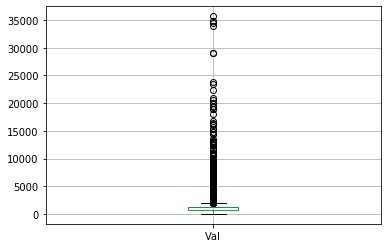

In [526]:
data_encoded[['Val']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab871c2278>]],
      dtype=object)

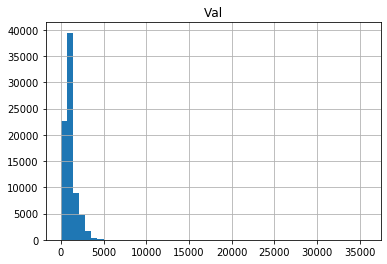

In [516]:
data_encoded[['Val']].hist(bins=50)

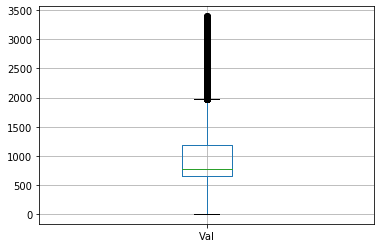

In [527]:
data_encoded = remove_outliers(data_encoded,'Val');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabc8c83828>]],
      dtype=object)

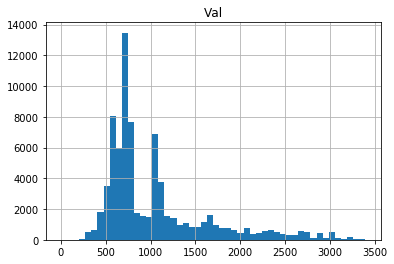

In [528]:
data_encoded[['Val']].hist(bins=50)


# Dividindo os valores em 5 categorias (1,2,3,4 e 5)

In [529]:
data_encoded.loc[:,'Val'] = pd.cut(data_encoded['Val'],5,labels=[1,2,3,4,5])

/home/ndc/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


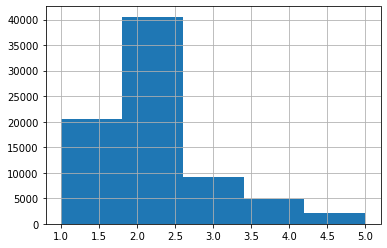

In [530]:
data_encoded['Val'].hist(bins=5)

In [531]:
data_encoded['Val'].describe()

count     77278
unique        5
top           2
freq      40553
Name: Val, dtype: int64

* Todas as colunas foram devidamente categorizadas
* A coluna da quantidade de anos em serviço já é nativamente categorizada

In [532]:
len(data_encoded['Quantidade de anos no Serviço público'].unique())

45

# Agora podemos capturar amostras de teste e treinamento

In [537]:
sample = get_sample(data_encoded)
train = sample['train'].reset_index(drop=True)
test = sample['test'].reset_index(drop=True)

Sample_Size:  7727 
Train:  6954 
Test:  773


# Árvore de decisão

In [538]:
train

,Val,Quantidade de anos no Serviço público,Descrição do cargo emprego_ADMINISTRADOR,Descrição do cargo emprego_ADVOGADO DA UNIAO,Descrição do cargo emprego_AGENTE ADMINISTRATIVO,Descrição do cargo emprego_AGENTE DE ATIV AGROPECUARIAS,Descrição do cargo emprego_AGENTE DE ATIVIDADES AGROPECUARIAS,Descrição do cargo emprego_AGENTE DE COLOCACAO,Descrição do cargo emprego_AGENTE DE HIGIENE E SEG NO TRABALHO,Descrição do cargo emprego_AGENTE DE INSP SANIT IND PROD ORIGEM ANI,...,Descrição do cargo emprego_TECNOLOGISTA,Descrição do cargo emprego_TECNOLOGISTA EM SAUDE PUBLICA,Descrição do cargo emprego_TECNOLOGO-FORMACAO,Descrição do cargo emprego_TELEFONISTA,Descrição do cargo emprego_TELEFONISTA 40 HORAS,Descrição do cargo emprego_TRATORISTA,Descrição do cargo emprego_VESTIARISTA,Descrição do cargo emprego_VIGIA,Descrição do cargo emprego_VIGILANTE,Descrição do cargo emprego_VISITADOR SANITARIO
0,1,40.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,34.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,38.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,40.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,37.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,1,37.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6950,2,37.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6951,2,31.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6952,1,32.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [539]:
from sklearn import tree
x_train = train.iloc[:,1:-1].to_numpy()
y_train = train.iloc[:,0].to_numpy().reshape(-1,1)


x_test = test.iloc[:,1:-1].to_numpy()
y_test = test.iloc[:,0].to_numpy().reshape(-1,1)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf.predict(x_test)

array([1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 4, 2, 2, 4, 2, 1, 3, 2, 2, 1,
       2, 2, 1, 4, 4, 2, 4, 2, 2, 2, 2, 3, 2, 2, 2, 1, 3, 2, 2, 1, 2, 2,
       2, 1, 2, 3, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 4, 2, 2, 1, 1, 1, 1, 2,
       4, 1, 2, 1, 2, 2, 2, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3,
       2, 2, 4, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       3, 1, 2, 2, 1, 1, 3, 2, 2, 1, 4, 2, 1, 2, 3, 2, 2, 1, 2, 1, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 1, 1, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 1,
       1, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 5, 2, 4, 2, 5, 1, 1, 3,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4,
       2, 4, 1, 2, 4, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 2, 4, 2, 1,
       3, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 5, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 3, 2, 1, 1, 2, 2, 2, 1, 2, 2, 3, 1, 2, 4, 4, 2, 2, 1,
       3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 3, 1, 2, 1, 2, 1, 2, 2, 3, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 4, 2, 1, 2, 1, 2, 2,

In [547]:
train.iloc[:,1:-1]

,Quantidade de anos no Serviço público,Descrição do cargo emprego_ADMINISTRADOR,Descrição do cargo emprego_ADVOGADO DA UNIAO,Descrição do cargo emprego_AGENTE ADMINISTRATIVO,Descrição do cargo emprego_AGENTE DE ATIV AGROPECUARIAS,Descrição do cargo emprego_AGENTE DE ATIVIDADES AGROPECUARIAS,Descrição do cargo emprego_AGENTE DE COLOCACAO,Descrição do cargo emprego_AGENTE DE HIGIENE E SEG NO TRABALHO,Descrição do cargo emprego_AGENTE DE INSP SANIT IND PROD ORIGEM ANI,Descrição do cargo emprego_AGENTE DE POL FEDERAL CLASSE ESPECIAL,...,Descrição do cargo emprego_TECNOL INF GEOGRAFICA ESTATISTICA,Descrição do cargo emprego_TECNOLOGISTA,Descrição do cargo emprego_TECNOLOGISTA EM SAUDE PUBLICA,Descrição do cargo emprego_TECNOLOGO-FORMACAO,Descrição do cargo emprego_TELEFONISTA,Descrição do cargo emprego_TELEFONISTA 40 HORAS,Descrição do cargo emprego_TRATORISTA,Descrição do cargo emprego_VESTIARISTA,Descrição do cargo emprego_VIGIA,Descrição do cargo emprego_VIGILANTE
0,40.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,37.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6950,37.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6951,31.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6952,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [549]:
train.iloc[:,1:-1]['Quantidade de anos no Serviço público'].describe()

count    6954.000000
mean       35.515962
std         4.819252
min         8.000000
25%        33.000000
50%        36.000000
75%        38.000000
max        53.000000
Name: Quantidade de anos no Serviço público, dtype: float64

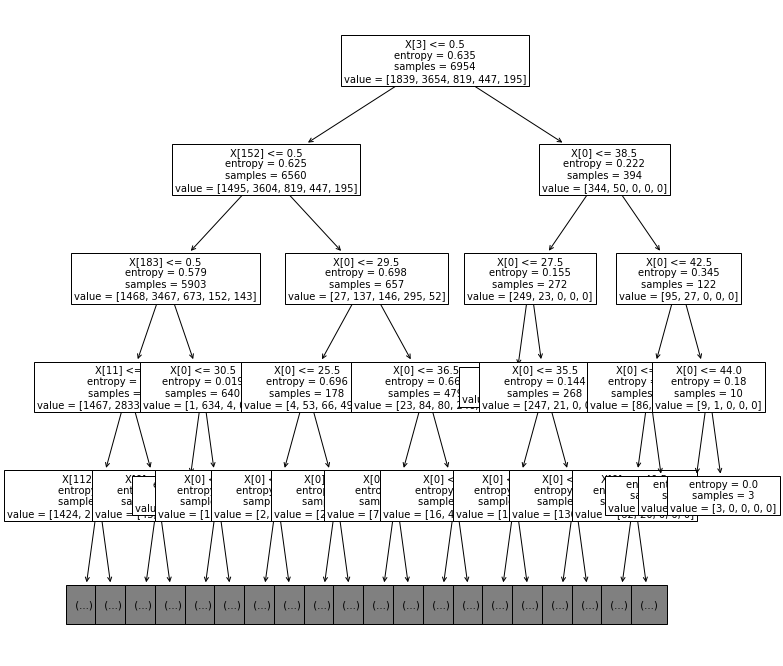

In [561]:
import graphviz 
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, max_depth=4, fontsize=10)
plt.show()

# Validando o modelo

In [562]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.04)


# Baixando arquivos (demora, só precisa baixar uma vez)

# Aposentadoria

# Baixando arquivos

In [44]:
apos_name_prefix='APOSENTADOS-'
aposentados_name_base = 'http://repositorio.dados.gov.br/segrt/'
months =['01','02','03','04','05','06','07','08','09','10','11','12']
years = range(2017,2021)
tables = []

In [53]:
for y in years:
  for m in months:
    filename = apos_name_prefix+str(m)+str(y)+'.CSV'
    url = abono_name_base+filename
    
    #try: #the .csv files goes until 2020-08
    try:
        urllib.request.urlretrieve(url, 'data/'+filename)        
        print(filename)
        print(url)        
        table = pd.read_csv(url, encoding = "ISO-8859-1", error_bad_lines=False)
        tables.append(table)
    except:
        pass    
        
    #except:
    #pass   
#http://repositorio.dados.gov.br/segrt/aposentados.052017.csv

APOSENTADOS-062018.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-062018.CSV


b'Skipping line 88: expected 4 fields, saw 6\nSkipping line 142: expected 4 fields, saw 6\nSkipping line 162: expected 4 fields, saw 6\nSkipping line 168: expected 4 fields, saw 6\nSkipping line 172: expected 4 fields, saw 6\nSkipping line 176: expected 4 fields, saw 6\nSkipping line 193: expected 4 fields, saw 6\nSkipping line 206: expected 4 fields, saw 6\nSkipping line 218: expected 4 fields, saw 6\nSkipping line 222: expected 4 fields, saw 6\nSkipping line 223: expected 4 fields, saw 6\nSkipping line 229: expected 4 fields, saw 6\nSkipping line 538: expected 4 fields, saw 6\nSkipping line 558: expected 4 fields, saw 5\nSkipping line 595: expected 4 fields, saw 6\nSkipping line 597: expected 4 fields, saw 6\nSkipping line 609: expected 4 fields, saw 6\nSkipping line 626: expected 4 fields, saw 6\nSkipping line 628: expected 4 fields, saw 6\nSkipping line 640: expected 4 fields, saw 6\nSkipping line 650: expected 4 fields, saw 6\nSkipping line 739: expected 4 fields, saw 6\nSkipping 

APOSENTADOS-072018.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-072018.CSV


b'Skipping line 35: expected 4 fields, saw 7\nSkipping line 75: expected 4 fields, saw 6\nSkipping line 76: expected 4 fields, saw 6\nSkipping line 83: expected 4 fields, saw 6\nSkipping line 137: expected 4 fields, saw 6\nSkipping line 141: expected 4 fields, saw 6\nSkipping line 161: expected 4 fields, saw 6\nSkipping line 165: expected 4 fields, saw 6\nSkipping line 179: expected 4 fields, saw 6\nSkipping line 197: expected 4 fields, saw 6\nSkipping line 211: expected 4 fields, saw 6\nSkipping line 214: expected 4 fields, saw 6\nSkipping line 215: expected 4 fields, saw 6\nSkipping line 218: expected 4 fields, saw 6\nSkipping line 241: expected 4 fields, saw 6\nSkipping line 245: expected 4 fields, saw 6\nSkipping line 248: expected 4 fields, saw 6\nSkipping line 250: expected 4 fields, saw 6\nSkipping line 253: expected 4 fields, saw 6\nSkipping line 289: expected 4 fields, saw 6\nSkipping line 446: expected 4 fields, saw 6\nSkipping line 451: expected 4 fields, saw 6\nSkipping lin

APOSENTADOS-092018.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-092018.CSV


b'Skipping line 70: expected 4 fields, saw 6\nSkipping line 71: expected 4 fields, saw 6\nSkipping line 72: expected 4 fields, saw 6\nSkipping line 73: expected 4 fields, saw 6\nSkipping line 104: expected 4 fields, saw 6\nSkipping line 107: expected 4 fields, saw 6\nSkipping line 110: expected 4 fields, saw 6\nSkipping line 111: expected 4 fields, saw 6\nSkipping line 133: expected 4 fields, saw 6\nSkipping line 134: expected 4 fields, saw 6\nSkipping line 140: expected 4 fields, saw 6\nSkipping line 144: expected 4 fields, saw 6\nSkipping line 162: expected 4 fields, saw 6\nSkipping line 169: expected 4 fields, saw 6\nSkipping line 179: expected 4 fields, saw 6\nSkipping line 180: expected 4 fields, saw 6\nSkipping line 184: expected 4 fields, saw 6\nSkipping line 186: expected 4 fields, saw 6\nSkipping line 190: expected 4 fields, saw 6\nSkipping line 191: expected 4 fields, saw 6\nSkipping line 363: expected 4 fields, saw 6\nSkipping line 369: expected 4 fields, saw 6\nSkipping lin

APOSENTADOS-102018.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-102018.CSV


b'Skipping line 10: expected 4 fields, saw 7\nSkipping line 41: expected 4 fields, saw 6\nSkipping line 42: expected 4 fields, saw 6\nSkipping line 61: expected 4 fields, saw 6\nSkipping line 77: expected 4 fields, saw 6\nSkipping line 99: expected 4 fields, saw 6\nSkipping line 122: expected 4 fields, saw 6\nSkipping line 126: expected 4 fields, saw 6\nSkipping line 127: expected 4 fields, saw 6\nSkipping line 130: expected 4 fields, saw 6\nSkipping line 139: expected 4 fields, saw 6\nSkipping line 254: expected 4 fields, saw 6\nSkipping line 255: expected 4 fields, saw 6\nSkipping line 257: expected 4 fields, saw 6\nSkipping line 258: expected 4 fields, saw 6\nSkipping line 321: expected 4 fields, saw 6\nSkipping line 325: expected 4 fields, saw 6\nSkipping line 328: expected 4 fields, saw 6\nSkipping line 329: expected 4 fields, saw 6\nSkipping line 353: expected 4 fields, saw 6\nSkipping line 361: expected 4 fields, saw 6\nSkipping line 376: expected 4 fields, saw 6\nSkipping line 

APOSENTADOS-112018.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-112018.CSV


b'Skipping line 26: expected 4 fields, saw 6\nSkipping line 36: expected 4 fields, saw 6\nSkipping line 44: expected 4 fields, saw 6\nSkipping line 45: expected 4 fields, saw 6\nSkipping line 89: expected 4 fields, saw 6\nSkipping line 90: expected 4 fields, saw 6\nSkipping line 113: expected 4 fields, saw 6\nSkipping line 117: expected 4 fields, saw 6\nSkipping line 121: expected 4 fields, saw 6\nSkipping line 139: expected 4 fields, saw 6\nSkipping line 145: expected 4 fields, saw 6\nSkipping line 157: expected 4 fields, saw 6\nSkipping line 158: expected 4 fields, saw 6\nSkipping line 159: expected 4 fields, saw 6\nSkipping line 162: expected 4 fields, saw 6\nSkipping line 164: expected 4 fields, saw 6\nSkipping line 168: expected 4 fields, saw 6\nSkipping line 352: expected 4 fields, saw 6\nSkipping line 353: expected 4 fields, saw 6\nSkipping line 354: expected 4 fields, saw 6\nSkipping line 355: expected 4 fields, saw 6\nSkipping line 361: expected 4 fields, saw 6\nSkipping line 

APOSENTADOS-122018.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-122018.CSV


b'Skipping line 39: expected 4 fields, saw 6\nSkipping line 83: expected 4 fields, saw 6\nSkipping line 87: expected 4 fields, saw 6\nSkipping line 108: expected 4 fields, saw 6\nSkipping line 111: expected 4 fields, saw 6\nSkipping line 120: expected 4 fields, saw 6\nSkipping line 141: expected 4 fields, saw 6\nSkipping line 142: expected 4 fields, saw 6\nSkipping line 151: expected 4 fields, saw 6\nSkipping line 154: expected 4 fields, saw 6\nSkipping line 159: expected 4 fields, saw 6\nSkipping line 160: expected 4 fields, saw 6\nSkipping line 161: expected 4 fields, saw 6\nSkipping line 162: expected 4 fields, saw 6\nSkipping line 163: expected 4 fields, saw 6\nSkipping line 164: expected 4 fields, saw 6\nSkipping line 165: expected 4 fields, saw 6\nSkipping line 166: expected 4 fields, saw 6\nSkipping line 167: expected 4 fields, saw 6\nSkipping line 168: expected 4 fields, saw 6\nSkipping line 170: expected 4 fields, saw 6\nSkipping line 171: expected 4 fields, saw 6\nSkipping li

APOSENTADOS-012019.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-012019.CSV


b'Skipping line 44: expected 4 fields, saw 6\nSkipping line 49: expected 4 fields, saw 6\nSkipping line 77: expected 4 fields, saw 6\nSkipping line 87: expected 4 fields, saw 6\nSkipping line 139: expected 4 fields, saw 6\nSkipping line 141: expected 4 fields, saw 6\nSkipping line 144: expected 4 fields, saw 6\nSkipping line 157: expected 4 fields, saw 6\nSkipping line 200: expected 4 fields, saw 6\nSkipping line 212: expected 4 fields, saw 6\nSkipping line 216: expected 4 fields, saw 6\nSkipping line 228: expected 4 fields, saw 6\nSkipping line 229: expected 4 fields, saw 6\nSkipping line 233: expected 4 fields, saw 6\nSkipping line 235: expected 4 fields, saw 6\nSkipping line 236: expected 4 fields, saw 6\nSkipping line 237: expected 4 fields, saw 6\nSkipping line 252: expected 4 fields, saw 6\nSkipping line 436: expected 4 fields, saw 6\nSkipping line 486: expected 4 fields, saw 6\nSkipping line 496: expected 4 fields, saw 6\nSkipping line 502: expected 4 fields, saw 6\nSkipping lin

APOSENTADOS-022019.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-022019.CSV


b'Skipping line 117: expected 4 fields, saw 6\nSkipping line 184: expected 4 fields, saw 6\nSkipping line 185: expected 4 fields, saw 6\nSkipping line 196: expected 4 fields, saw 6\nSkipping line 224: expected 4 fields, saw 6\nSkipping line 290: expected 4 fields, saw 6\nSkipping line 291: expected 4 fields, saw 6\nSkipping line 305: expected 4 fields, saw 6\nSkipping line 306: expected 4 fields, saw 6\nSkipping line 307: expected 4 fields, saw 6\nSkipping line 309: expected 4 fields, saw 6\nSkipping line 312: expected 4 fields, saw 6\nSkipping line 314: expected 4 fields, saw 6\nSkipping line 315: expected 4 fields, saw 6\nSkipping line 584: expected 4 fields, saw 6\nSkipping line 586: expected 4 fields, saw 6\nSkipping line 588: expected 4 fields, saw 6\nSkipping line 589: expected 4 fields, saw 6\nSkipping line 816: expected 4 fields, saw 6\nSkipping line 850: expected 4 fields, saw 6\nSkipping line 854: expected 4 fields, saw 6\nSkipping line 868: expected 4 fields, saw 6\nSkipping

APOSENTADOS-032019.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-032019.CSV


b'Skipping line 124: expected 4 fields, saw 6\nSkipping line 276: expected 4 fields, saw 6\nSkipping line 278: expected 4 fields, saw 6\nSkipping line 390: expected 4 fields, saw 6\nSkipping line 396: expected 4 fields, saw 6\nSkipping line 408: expected 4 fields, saw 6\nSkipping line 444: expected 4 fields, saw 6\nSkipping line 457: expected 4 fields, saw 6\nSkipping line 472: expected 4 fields, saw 6\nSkipping line 478: expected 4 fields, saw 6\nSkipping line 483: expected 4 fields, saw 6\nSkipping line 651: expected 4 fields, saw 6\nSkipping line 673: expected 4 fields, saw 6\nSkipping line 674: expected 4 fields, saw 6\nSkipping line 675: expected 4 fields, saw 6\nSkipping line 676: expected 4 fields, saw 6\nSkipping line 677: expected 4 fields, saw 6\nSkipping line 678: expected 4 fields, saw 6\nSkipping line 679: expected 4 fields, saw 6\nSkipping line 682: expected 4 fields, saw 6\nSkipping line 684: expected 4 fields, saw 6\nSkipping line 686: expected 4 fields, saw 6\nSkipping

APOSENTADOS-042019.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-042019.CSV


b'Skipping line 170: expected 4 fields, saw 7\nSkipping line 236: expected 4 fields, saw 6\nSkipping line 241: expected 4 fields, saw 6\nSkipping line 293: expected 4 fields, saw 6\nSkipping line 302: expected 4 fields, saw 6\nSkipping line 350: expected 4 fields, saw 6\nSkipping line 391: expected 4 fields, saw 6\nSkipping line 410: expected 4 fields, saw 6\nSkipping line 412: expected 4 fields, saw 6\nSkipping line 415: expected 4 fields, saw 6\nSkipping line 482: expected 4 fields, saw 6\nSkipping line 537: expected 4 fields, saw 6\nSkipping line 584: expected 4 fields, saw 6\nSkipping line 586: expected 4 fields, saw 6\nSkipping line 587: expected 4 fields, saw 6\nSkipping line 588: expected 4 fields, saw 6\nSkipping line 590: expected 4 fields, saw 6\nSkipping line 591: expected 4 fields, saw 6\nSkipping line 592: expected 4 fields, saw 6\nSkipping line 593: expected 4 fields, saw 6\nSkipping line 597: expected 4 fields, saw 6\nSkipping line 605: expected 4 fields, saw 6\nSkipping

APOSENTADOS-052019.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-052019.CSV


b'Skipping line 213: expected 4 fields, saw 6\nSkipping line 281: expected 4 fields, saw 6\nSkipping line 320: expected 4 fields, saw 6\nSkipping line 321: expected 4 fields, saw 6\nSkipping line 373: expected 4 fields, saw 6\nSkipping line 395: expected 4 fields, saw 6\nSkipping line 418: expected 4 fields, saw 6\nSkipping line 434: expected 4 fields, saw 6\nSkipping line 439: expected 4 fields, saw 6\nSkipping line 441: expected 4 fields, saw 6\nSkipping line 505: expected 4 fields, saw 6\nSkipping line 510: expected 4 fields, saw 6\nSkipping line 539: expected 4 fields, saw 6\nSkipping line 542: expected 4 fields, saw 6\nSkipping line 543: expected 4 fields, saw 6\nSkipping line 544: expected 4 fields, saw 6\nSkipping line 545: expected 4 fields, saw 6\nSkipping line 554: expected 4 fields, saw 6\nSkipping line 559: expected 4 fields, saw 6\nSkipping line 561: expected 4 fields, saw 6\nSkipping line 562: expected 4 fields, saw 6\nSkipping line 570: expected 4 fields, saw 6\nSkipping

APOSENTADOS-062019.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-062019.CSV


b'Skipping line 180: expected 4 fields, saw 6\nSkipping line 184: expected 4 fields, saw 6\nSkipping line 192: expected 4 fields, saw 6\nSkipping line 244: expected 4 fields, saw 6\nSkipping line 248: expected 4 fields, saw 6\nSkipping line 252: expected 4 fields, saw 6\nSkipping line 257: expected 4 fields, saw 6\nSkipping line 315: expected 4 fields, saw 6\nSkipping line 317: expected 4 fields, saw 6\nSkipping line 318: expected 4 fields, saw 6\nSkipping line 324: expected 4 fields, saw 6\nSkipping line 348: expected 4 fields, saw 6\nSkipping line 349: expected 4 fields, saw 6\nSkipping line 350: expected 4 fields, saw 6\nSkipping line 357: expected 4 fields, saw 6\nSkipping line 377: expected 4 fields, saw 6\nSkipping line 384: expected 4 fields, saw 6\nSkipping line 418: expected 4 fields, saw 6\nSkipping line 445: expected 4 fields, saw 6\nSkipping line 446: expected 4 fields, saw 6\nSkipping line 517: expected 4 fields, saw 6\nSkipping line 533: expected 4 fields, saw 6\nSkipping

APOSENTADOS-072019.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-072019.CSV


b'Skipping line 52: expected 4 fields, saw 7\nSkipping line 144: expected 4 fields, saw 6\nSkipping line 145: expected 4 fields, saw 6\nSkipping line 146: expected 4 fields, saw 6\nSkipping line 147: expected 4 fields, saw 6\nSkipping line 148: expected 4 fields, saw 6\nSkipping line 149: expected 4 fields, saw 6\nSkipping line 152: expected 4 fields, saw 6\nSkipping line 156: expected 4 fields, saw 6\nSkipping line 244: expected 4 fields, saw 6\nSkipping line 288: expected 4 fields, saw 6\nSkipping line 298: expected 4 fields, saw 6\nSkipping line 333: expected 4 fields, saw 6\nSkipping line 358: expected 4 fields, saw 6\nSkipping line 401: expected 4 fields, saw 6\nSkipping line 408: expected 4 fields, saw 6\nSkipping line 410: expected 4 fields, saw 6\nSkipping line 425: expected 4 fields, saw 6\nSkipping line 427: expected 4 fields, saw 6\nSkipping line 428: expected 4 fields, saw 6\nSkipping line 429: expected 4 fields, saw 6\nSkipping line 430: expected 4 fields, saw 6\nSkipping 

APOSENTADOS-082019.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-082019.CSV


b'Skipping line 229: expected 4 fields, saw 6\nSkipping line 231: expected 4 fields, saw 6\nSkipping line 232: expected 4 fields, saw 6\nSkipping line 233: expected 4 fields, saw 6\nSkipping line 238: expected 4 fields, saw 6\nSkipping line 268: expected 4 fields, saw 6\nSkipping line 284: expected 4 fields, saw 6\nSkipping line 286: expected 4 fields, saw 6\nSkipping line 296: expected 4 fields, saw 6\nSkipping line 297: expected 4 fields, saw 6\nSkipping line 303: expected 4 fields, saw 6\nSkipping line 352: expected 4 fields, saw 6\nSkipping line 355: expected 4 fields, saw 6\nSkipping line 359: expected 4 fields, saw 6\nSkipping line 429: expected 4 fields, saw 6\nSkipping line 430: expected 4 fields, saw 6\nSkipping line 433: expected 4 fields, saw 6\nSkipping line 441: expected 4 fields, saw 6\nSkipping line 466: expected 4 fields, saw 6\nSkipping line 467: expected 4 fields, saw 6\nSkipping line 468: expected 4 fields, saw 6\nSkipping line 479: expected 4 fields, saw 6\nSkipping

APOSENTADOS-092019.CSV
http://repositorio.dados.gov.br/segrt/APOSENTADOS-092019.CSV


b'Skipping line 290: expected 4 fields, saw 6\nSkipping line 291: expected 4 fields, saw 6\nSkipping line 375: expected 4 fields, saw 6\nSkipping line 390: expected 4 fields, saw 6\nSkipping line 419: expected 4 fields, saw 6\nSkipping line 420: expected 4 fields, saw 6\nSkipping line 421: expected 4 fields, saw 6\nSkipping line 442: expected 4 fields, saw 6\nSkipping line 474: expected 4 fields, saw 6\nSkipping line 490: expected 4 fields, saw 6\nSkipping line 503: expected 4 fields, saw 6\nSkipping line 508: expected 4 fields, saw 6\nSkipping line 557: expected 4 fields, saw 6\nSkipping line 575: expected 4 fields, saw 6\nSkipping line 620: expected 4 fields, saw 6\nSkipping line 646: expected 4 fields, saw 6\nSkipping line 650: expected 4 fields, saw 6\nSkipping line 651: expected 4 fields, saw 6\nSkipping line 1037: expected 4 fields, saw 6\nSkipping line 1039: expected 4 fields, saw 6\nSkipping line 1045: expected 4 fields, saw 6\nSkipping line 1047: expected 4 fields, saw 6\nSkip